Running simulation with tau=10000...
Final dimer count: 1148


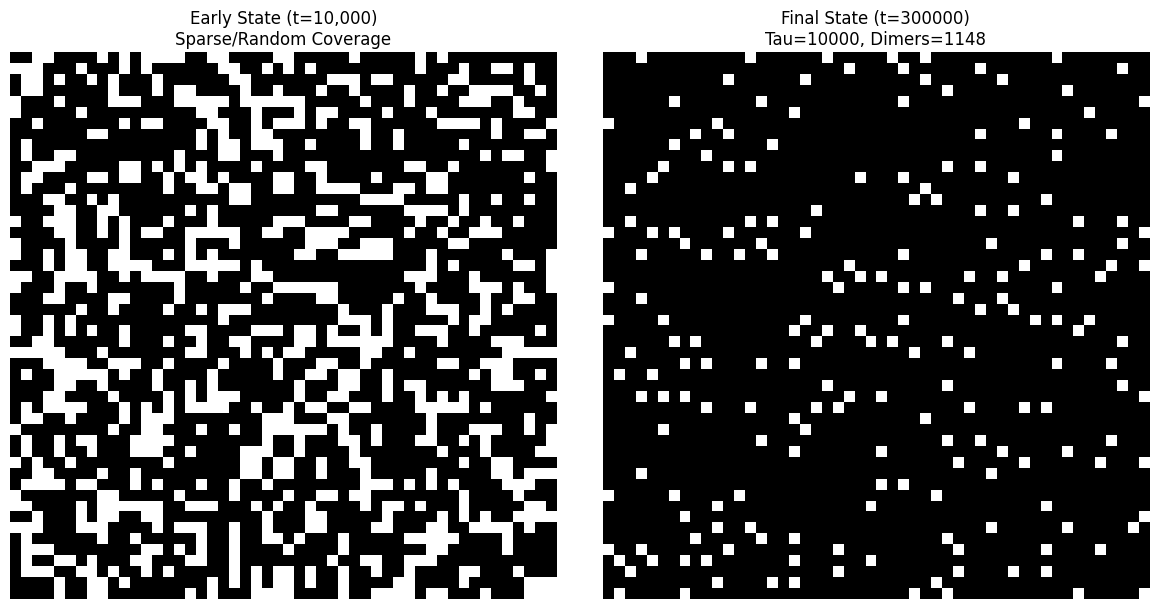


--- Part B: Cooling Schedule Analysis ---
Tau (Time Constant)  | Final Dimer Count    | Fill Percentage     
-----------------------------------------------------------------
100                  | 790                  | 63.20%
1000                 | 1138                 | 91.04%
10000                | 1148                 | 91.84%
50000                | 1169                 | 93.52%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class DimerSimulation:
    def __init__(self, L=50, T0=10.0, tau=10000):
        self.L = L
        self.T0 = T0
        self.tau = tau
        
        self.grid = np.zeros((L, L), dtype=int)
        
        self.partners = {} 
        
        self.dimer_count = 0
        self.t = 0  

    def get_neighbor(self, r, c):
        """Returns coordinates of a random neighbor (up, down, left, right).
           Returns None if the neighbor is out of bounds."""
        dr, dc = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        nr, nc = r + dr, c + dc
        
        if 0 <= nr < self.L and 0 <= nc < self.L:
            return nr, nc
        return None, None

    def step(self):
        self.t += 1
        current_T = self.T0 * np.exp(-self.t / self.tau)
        
        r1, c1 = random.randint(0, self.L - 1), random.randint(0, self.L - 1)
        
        r2, c2 = self.get_neighbor(r1, c1)
        if r2 is None: return # Hit boundary, abort move
        
        if self.grid[r1, c1] == 0 and self.grid[r2, c2] == 0:
            # Place dimer
            self.grid[r1, c1] = 1
            self.grid[r2, c2] = 1
            self.partners[(r1, c1)] = (r2, c2)
            self.partners[(r2, c2)] = (r1, c1)
            self.dimer_count += 1
            
        elif self.grid[r1, c1] == 1 and self.grid[r2, c2] == 1:
            if self.partners.get((r1, c1)) == (r2, c2):
                prob = np.exp(-1.0 / current_T)
                
                if random.random() < prob:
                    # Remove dimer
                    self.grid[r1, c1] = 0
                    self.grid[r2, c2] = 0
                    del self.partners[(r1, c1)]
                    del self.partners[(r2, c2)]
                    self.dimer_count -= 1
        

    def run(self, total_steps):
        early_state = None
        snapshot_time = 10000 
        
        for i in range(total_steps):
            self.step()
            if i == snapshot_time:
                early_state = self.grid.copy()
                
        return early_state, self.grid.copy()

L = 50
tau = 10000
total_steps = 300000 
sim = DimerSimulation(L=L, tau=tau)

print(f"Running simulation with tau={tau}...")
early_grid, final_grid = sim.run(total_steps)
print(f"Final dimer count: {sim.dimer_count}")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(early_grid, cmap='binary', interpolation='nearest')
ax[0].set_title(f"Early State (t=10,000)\nSparse/Random Coverage")
ax[0].axis('off')

ax[1].imshow(final_grid, cmap='binary', interpolation='nearest')
ax[1].set_title(f"Final State (t={total_steps})\nTau={tau}, Dimers={sim.dimer_count}")
ax[1].axis('off')

plt.tight_layout()
plt.show()

print("\n--- Part B: Cooling Schedule Analysis ---")
print(f"{'Tau (Time Constant)':<20} | {'Final Dimer Count':<20} | {'Fill Percentage':<20}")
print("-" * 65)

tau_values = [100, 1000, 10000, 50000]

for t_val in tau_values:
    steps = t_val * 20 
    s = DimerSimulation(L=50, tau=t_val)
    _, _ = s.run(steps)
    
    fill_pct = (s.dimer_count * 2) / (50 * 50) * 100
    print(f"{t_val:<20} | {s.dimer_count:<20} | {fill_pct:.2f}%")